In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [157]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [161]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [163]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [165]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

#Check if the data types are right 
df_uk_full.dtypes

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_9912\3670151657.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

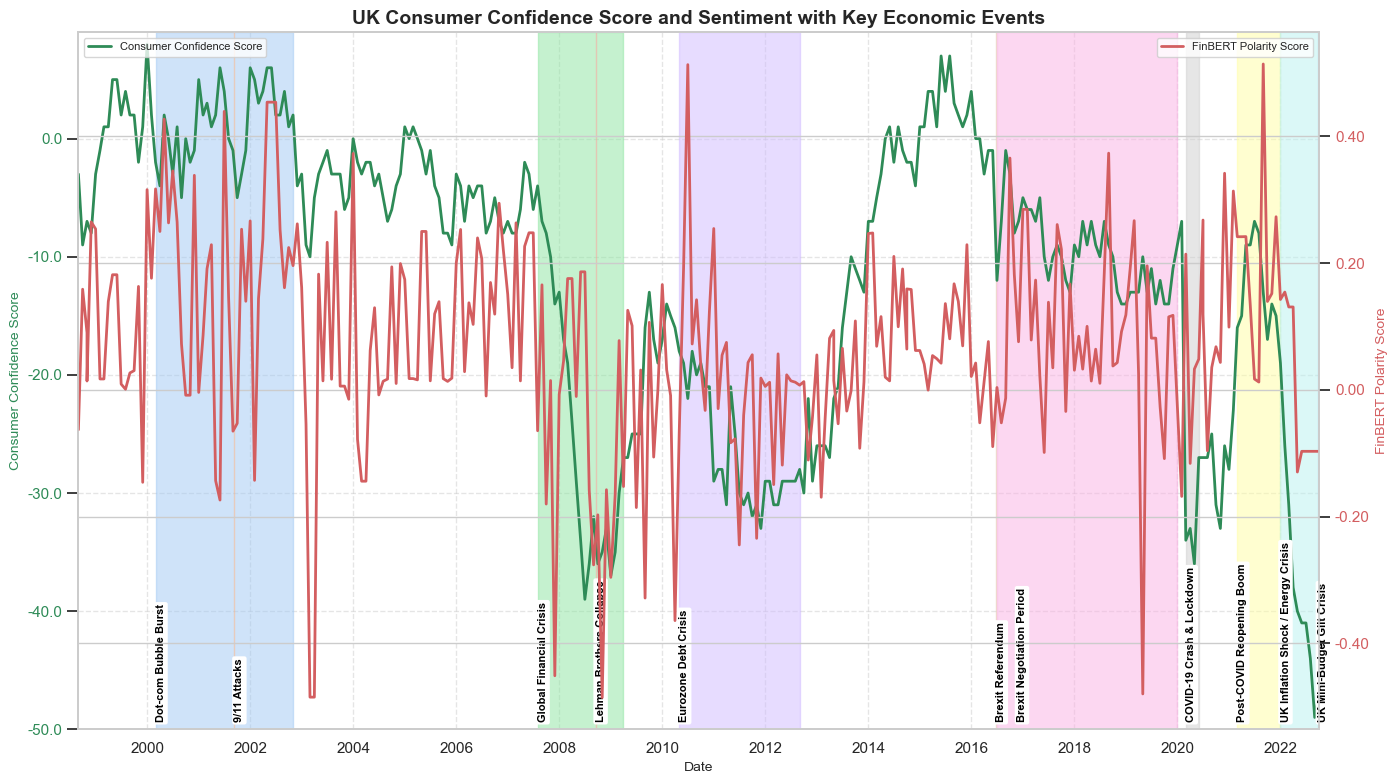

In [634]:
# Filter data from 1 Sep 1998 onwards
start_date = pd.to_datetime('1998-09-01')
df_plot = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot = df_plot.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Define key economic events
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Plot style
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score Plot
color_cs = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Consumer Confidence Score', color=color_cs, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['confidence_score'], color=color_cs, label='Consumer Confidence Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cs, size=8)

# Sentiment Score Plot
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Event Shading and Labels
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    if end >= start_date:
        display_start = max(start, start_date)
        ax1.axvspan(display_start, end, color=event_colors[i % len(event_colors)], alpha=0.5)
        label_x_pos = label_positions.get(event_name, display_start)

        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'
                 ))
        i += 1

# Titles and formatting
plt.title('UK Consumer Confidence Score and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Legends
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(df_plot['confidence_score'].min() - 1, df_plot['confidence_score'].max() + 1)


plt.show()


### The chart shows that Customer Confidence Score is highly sensitive to major economic events, with sharp declines during crises such as the 2008 financial crash, Brexit, and the COVID-19 lockdown. While FinBERT Polarity Score also reacts to these events, it remains relatively more stable and tends to show shorter-lived spikes. Notably, the two measures sometimes move in different directions, highlighting that confidence scores reflect public economic outlook, whereas FinBERT sentiment captures the tone of Bank of England communications.

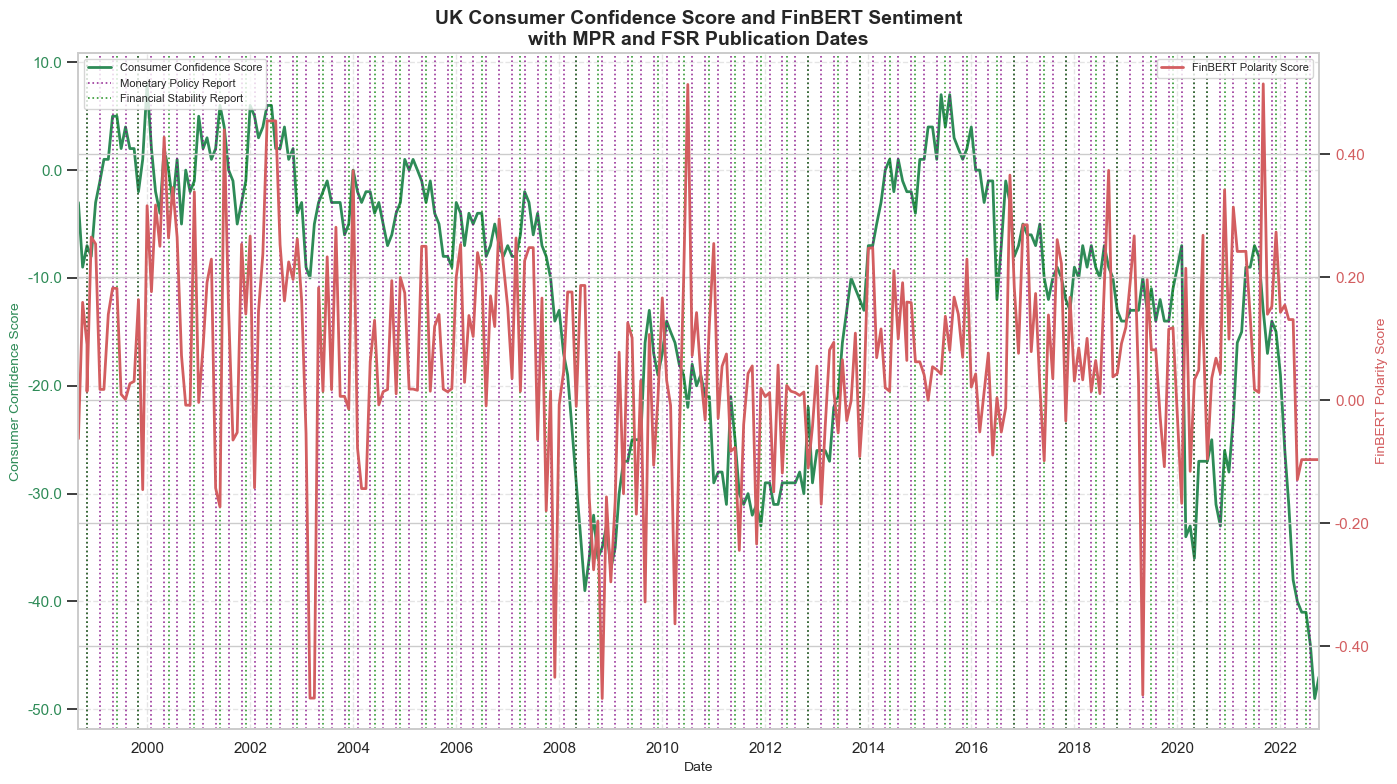

In [636]:
# Filter data from 1 Sep 1998 onwards
start_date = pd.to_datetime('1998-09-01')
df_plot2 = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Load publication dates from repo
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# Apply style
sns.set_style('whitegrid')

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score (Left Axis)
color_conf = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Consumer Confidence Score', color=color_conf, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['confidence_score'], color=color_conf, label='Consumer Confidence Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_conf, size=8)

# FinBERT Polarity Score (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Add MPR vertical lines (Purple)
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# Add FSR vertical lines (Green)
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# Title and layout
plt.title('UK Consumer Confidence Score and FinBERT Sentiment\nwith MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# Y-axis formatting
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Deduplicated legends
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot2['Date'].max())
# Optional: remove y-axis limit so negative confidence values show
# ax1.set_ylim(bottom=-0.5)  # <-- comment or remove this line if needed

plt.show()

In [176]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_full.drop(['ftse_250_price',
                            'ftse_350_Price',
                            'ftse_350_Total Return (Gross, Unhedged)',
                            'price_02_Price',
                            'price_05_Price',
                            'price_05_Total Return (Gross, Unhedged)',
                            'price_10_Price',
                            'price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

In [178]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [432]:
# Define the new order of the columns
new_column_order = [
    'Date', 'confidence_score', 'finbert_sentiment_score', 'CPI_pct_change',
     'unemployment_rate','wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,confidence_score,finbert_sentiment_score,CPI_pct_change,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
0,1989-12-01,NaN,NaN,NaN,NaN,NaN,0.5,803.789978,14.713333,NaN
1,1990-01-01,-19.0,NaN,5.7,6.9,NaN,0.5,783.250000,14.630000,NaN
2,1990-02-01,-24.0,NaN,5.9,6.9,NaN,0.5,746.010010,14.546667,NaN
3,1990-03-01,-35.0,NaN,6.0,6.9,NaN,0.7,741.700012,14.463333,NaN
4,1990-04-01,-31.0,NaN,6.4,6.9,NaN,0.7,701.510010,14.380000,NaN


### Corraletion Analysis

#### Create pairplot for visual correlation analysis

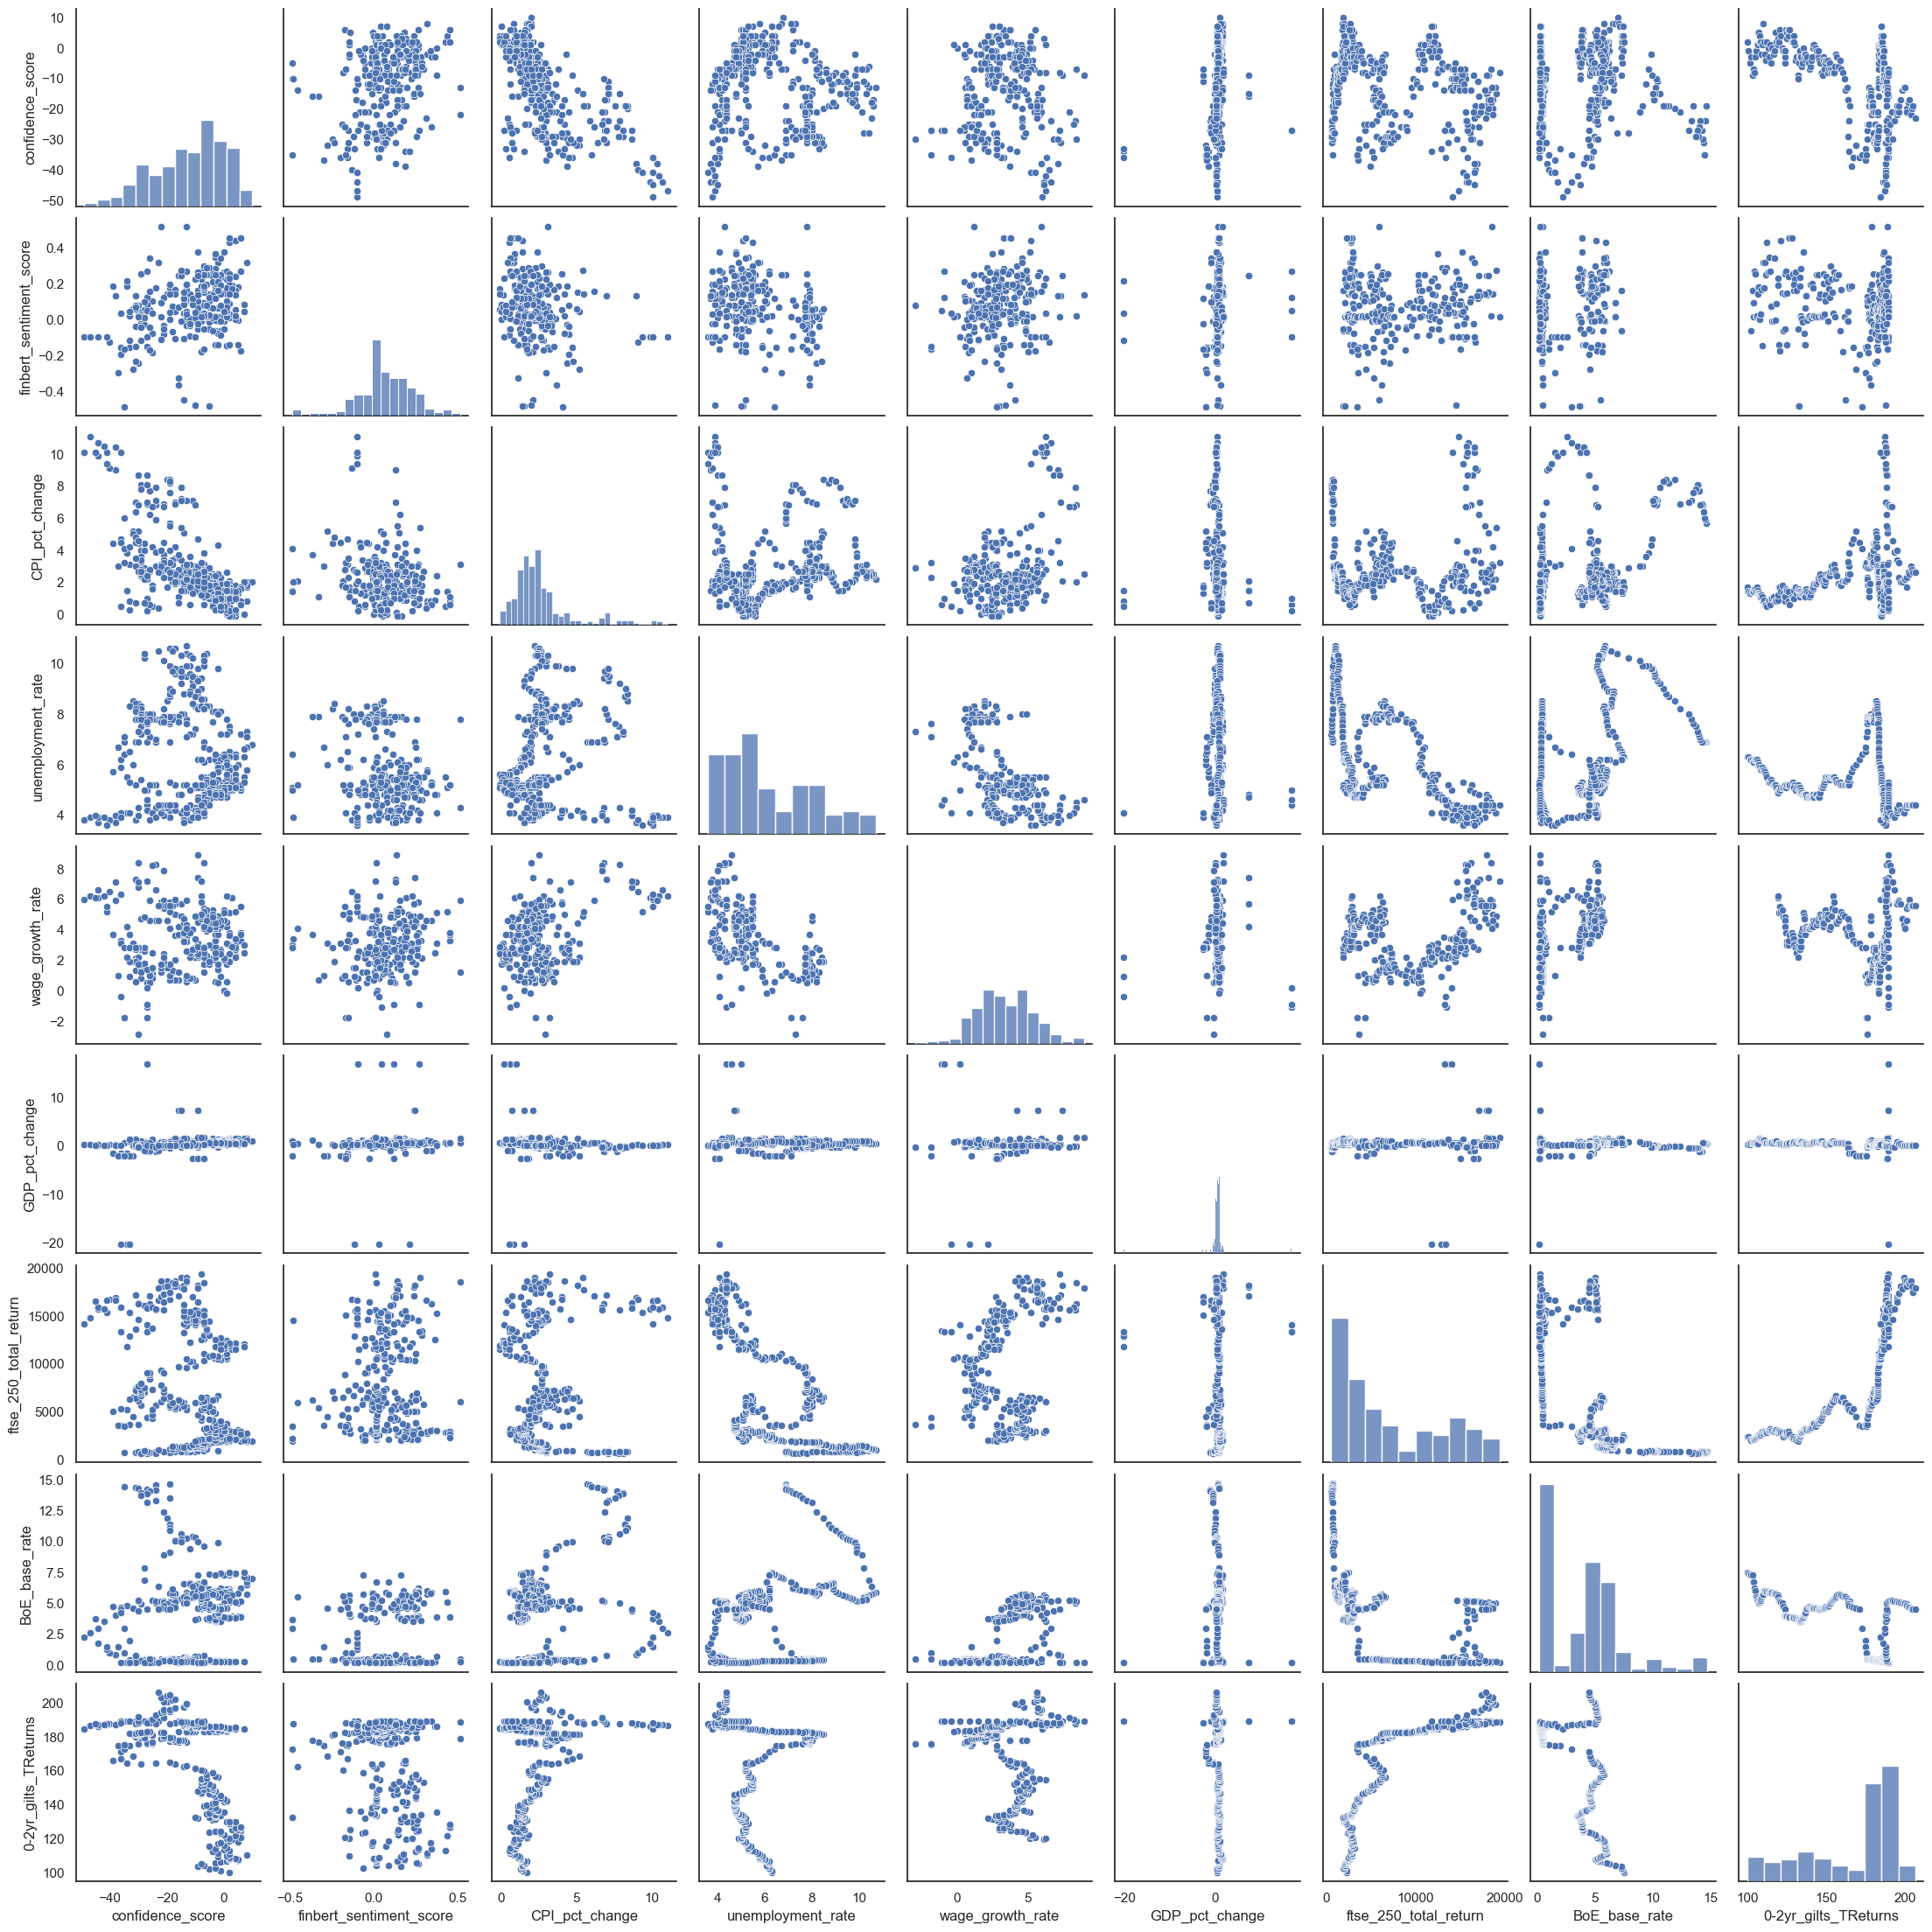

In [436]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

#### Create correlation matrices

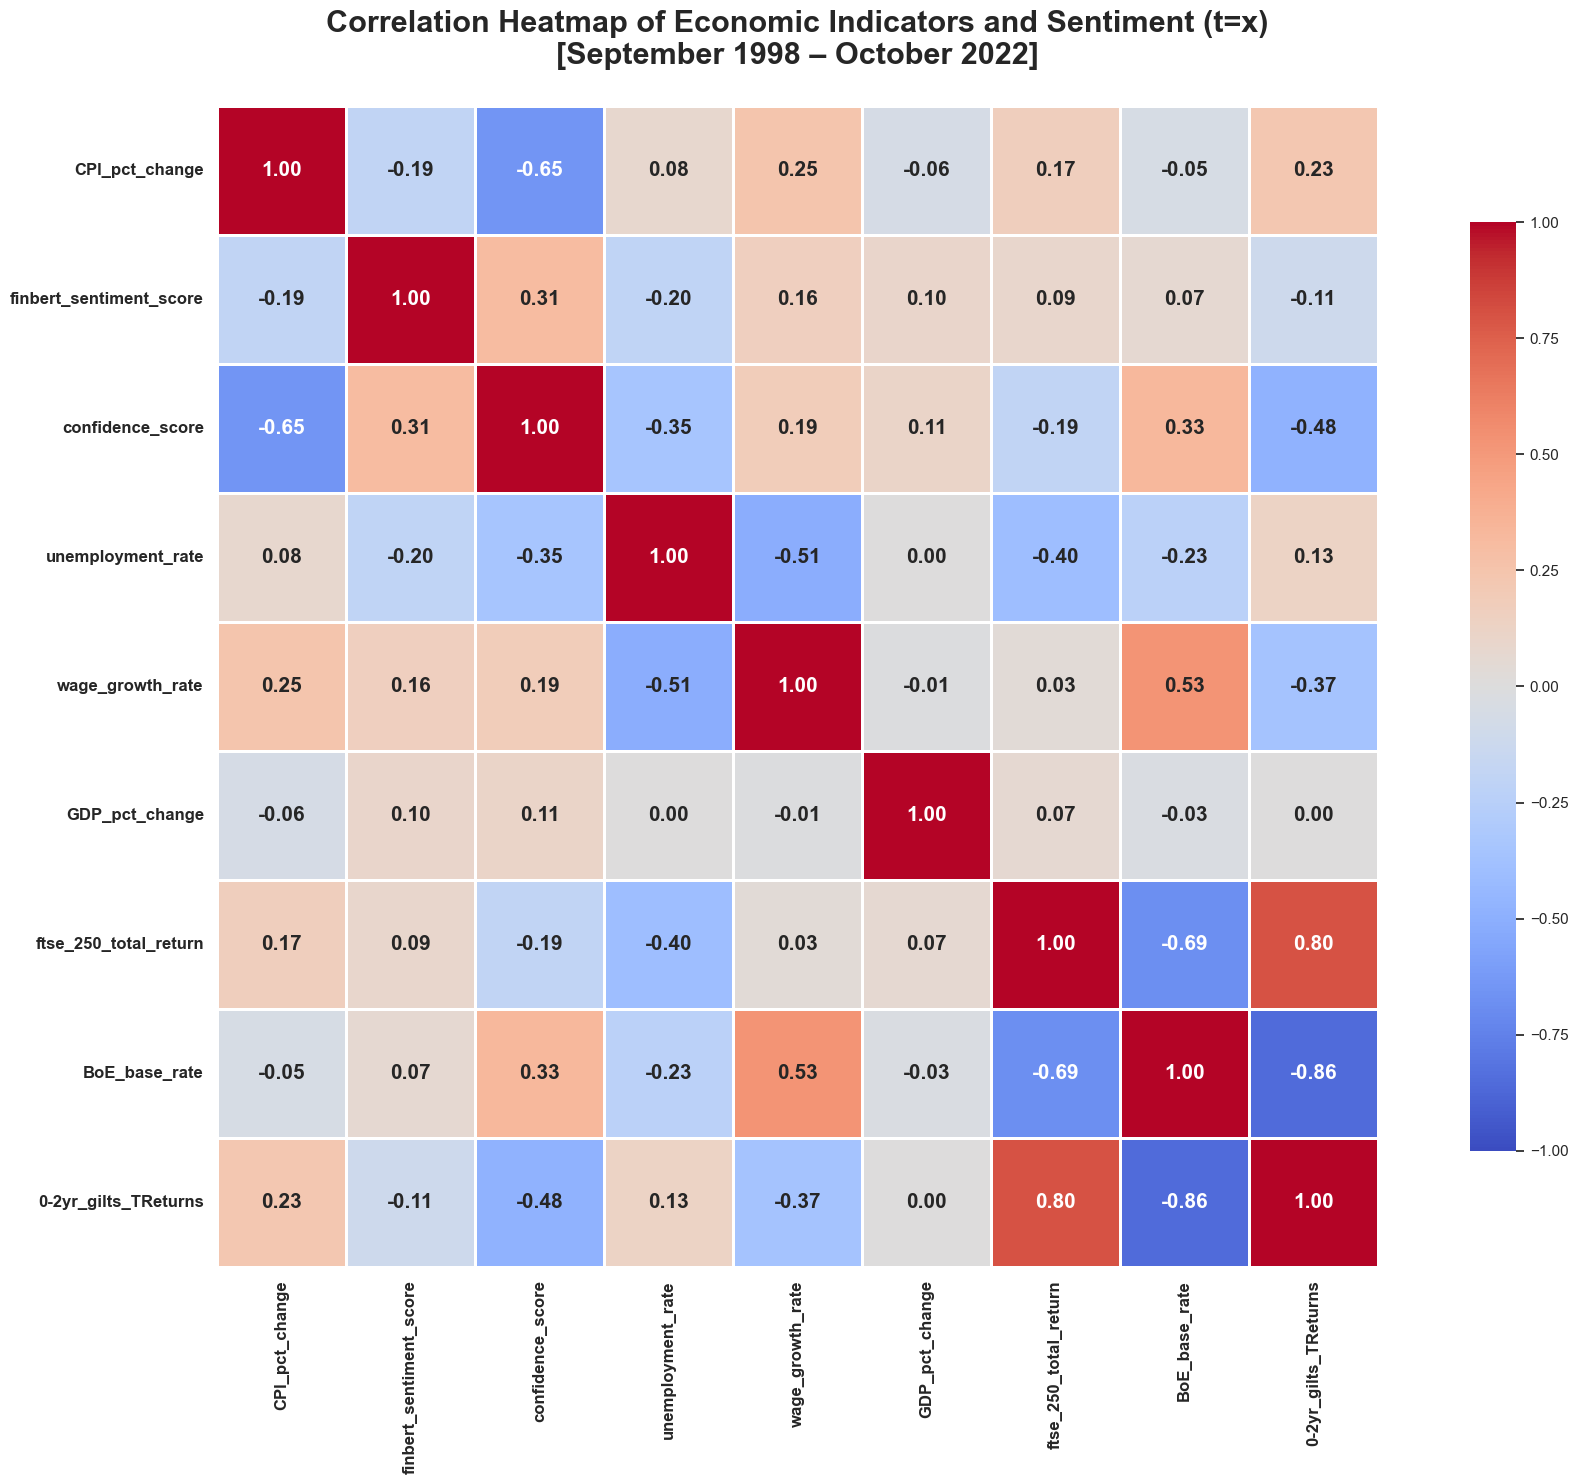

In [195]:
# --- Ensure date formatting ---
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], errors='coerce')

# --- Filter timeframe ---
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) & 
    (df_uk_focused['Date'] <= end_date)
].copy()

# --- Correlation on numeric columns only ---
numeric_data = filtered_df.select_dtypes(include='number').dropna()
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap of Economic Indicators and Sentiment (t=x)\n[September 1998 – October 2022]', 
          fontsize=22, fontweight='bold', pad=30)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

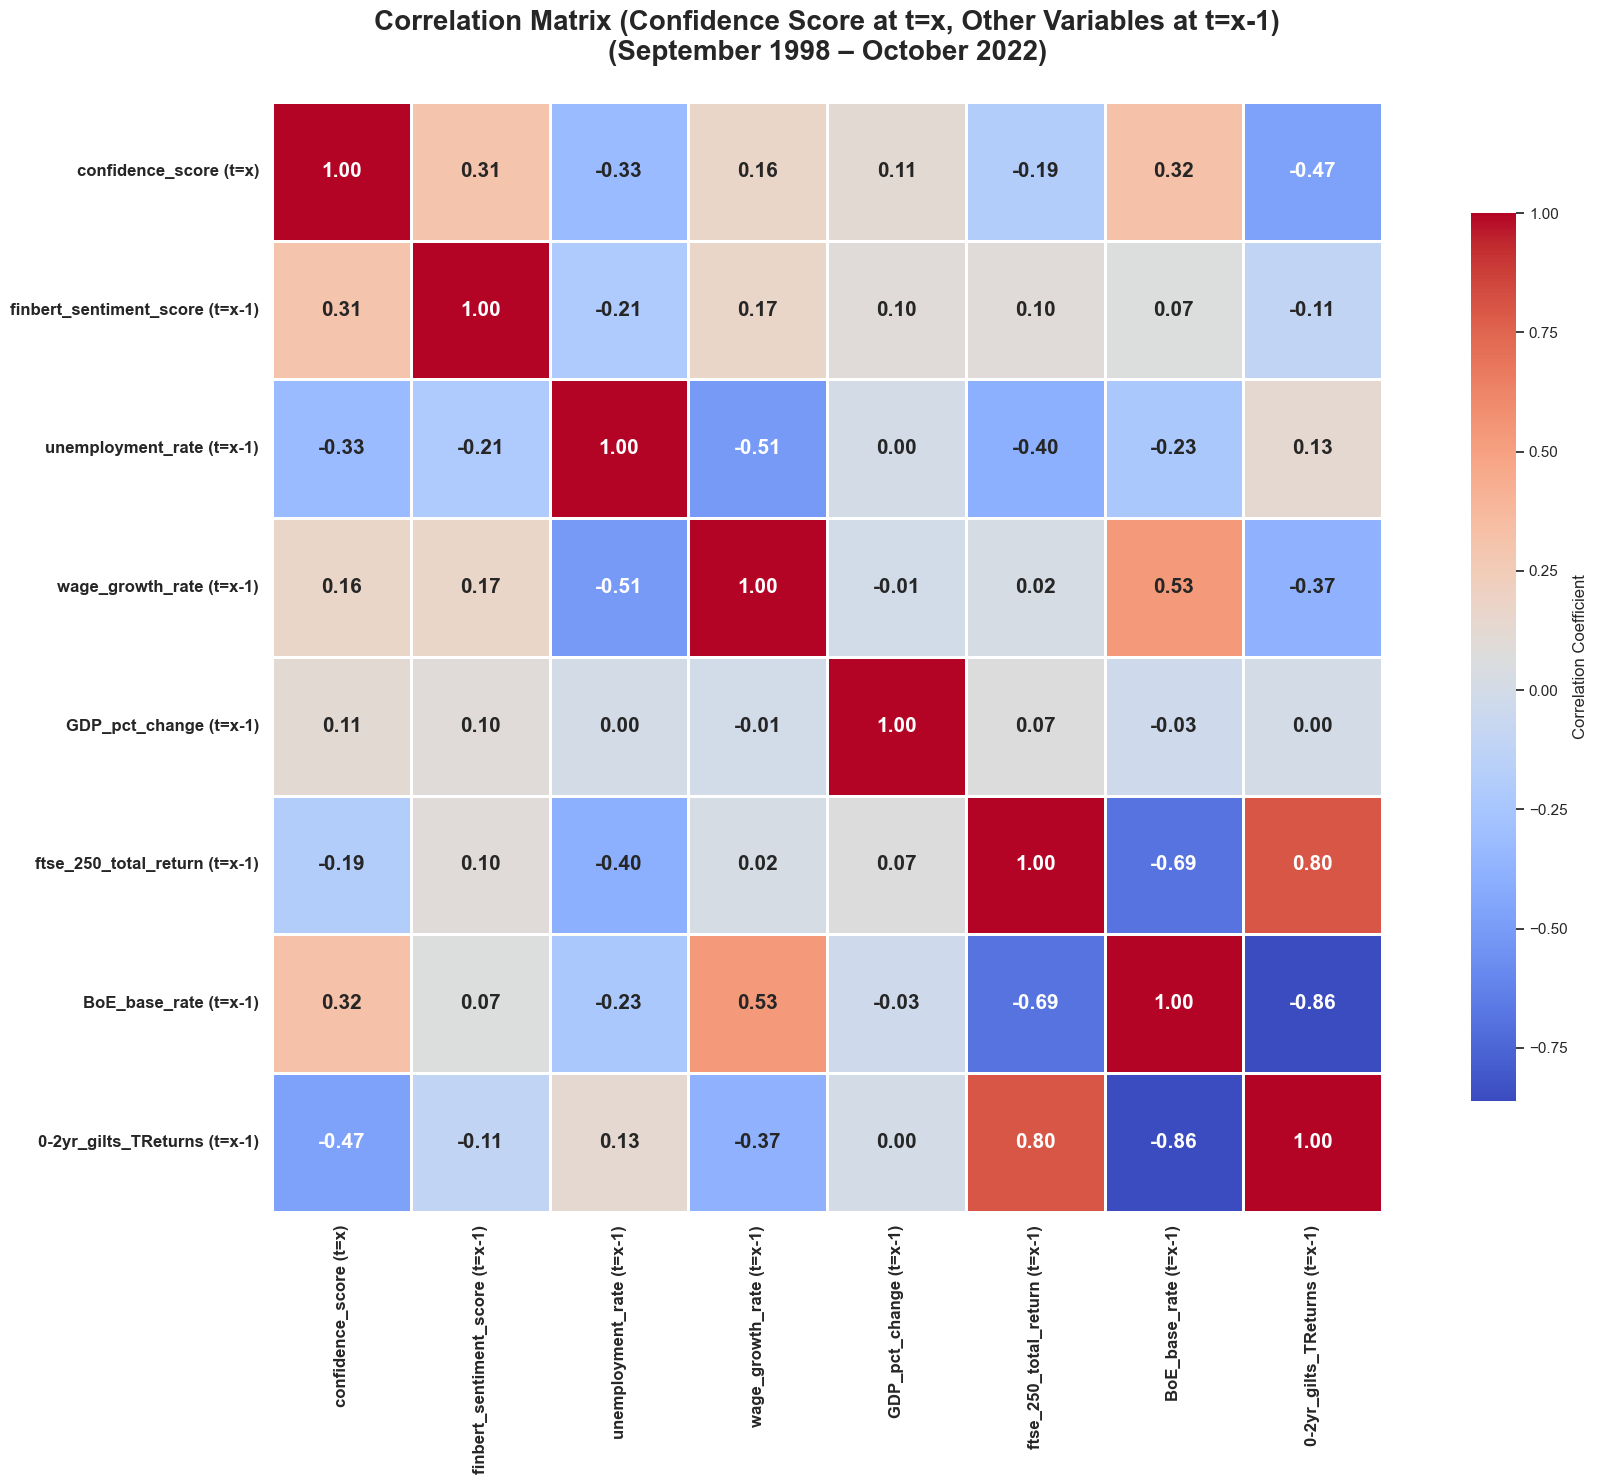

In [438]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Define date range
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest
columns_of_interest = ['confidence_score'
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 1-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-1)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


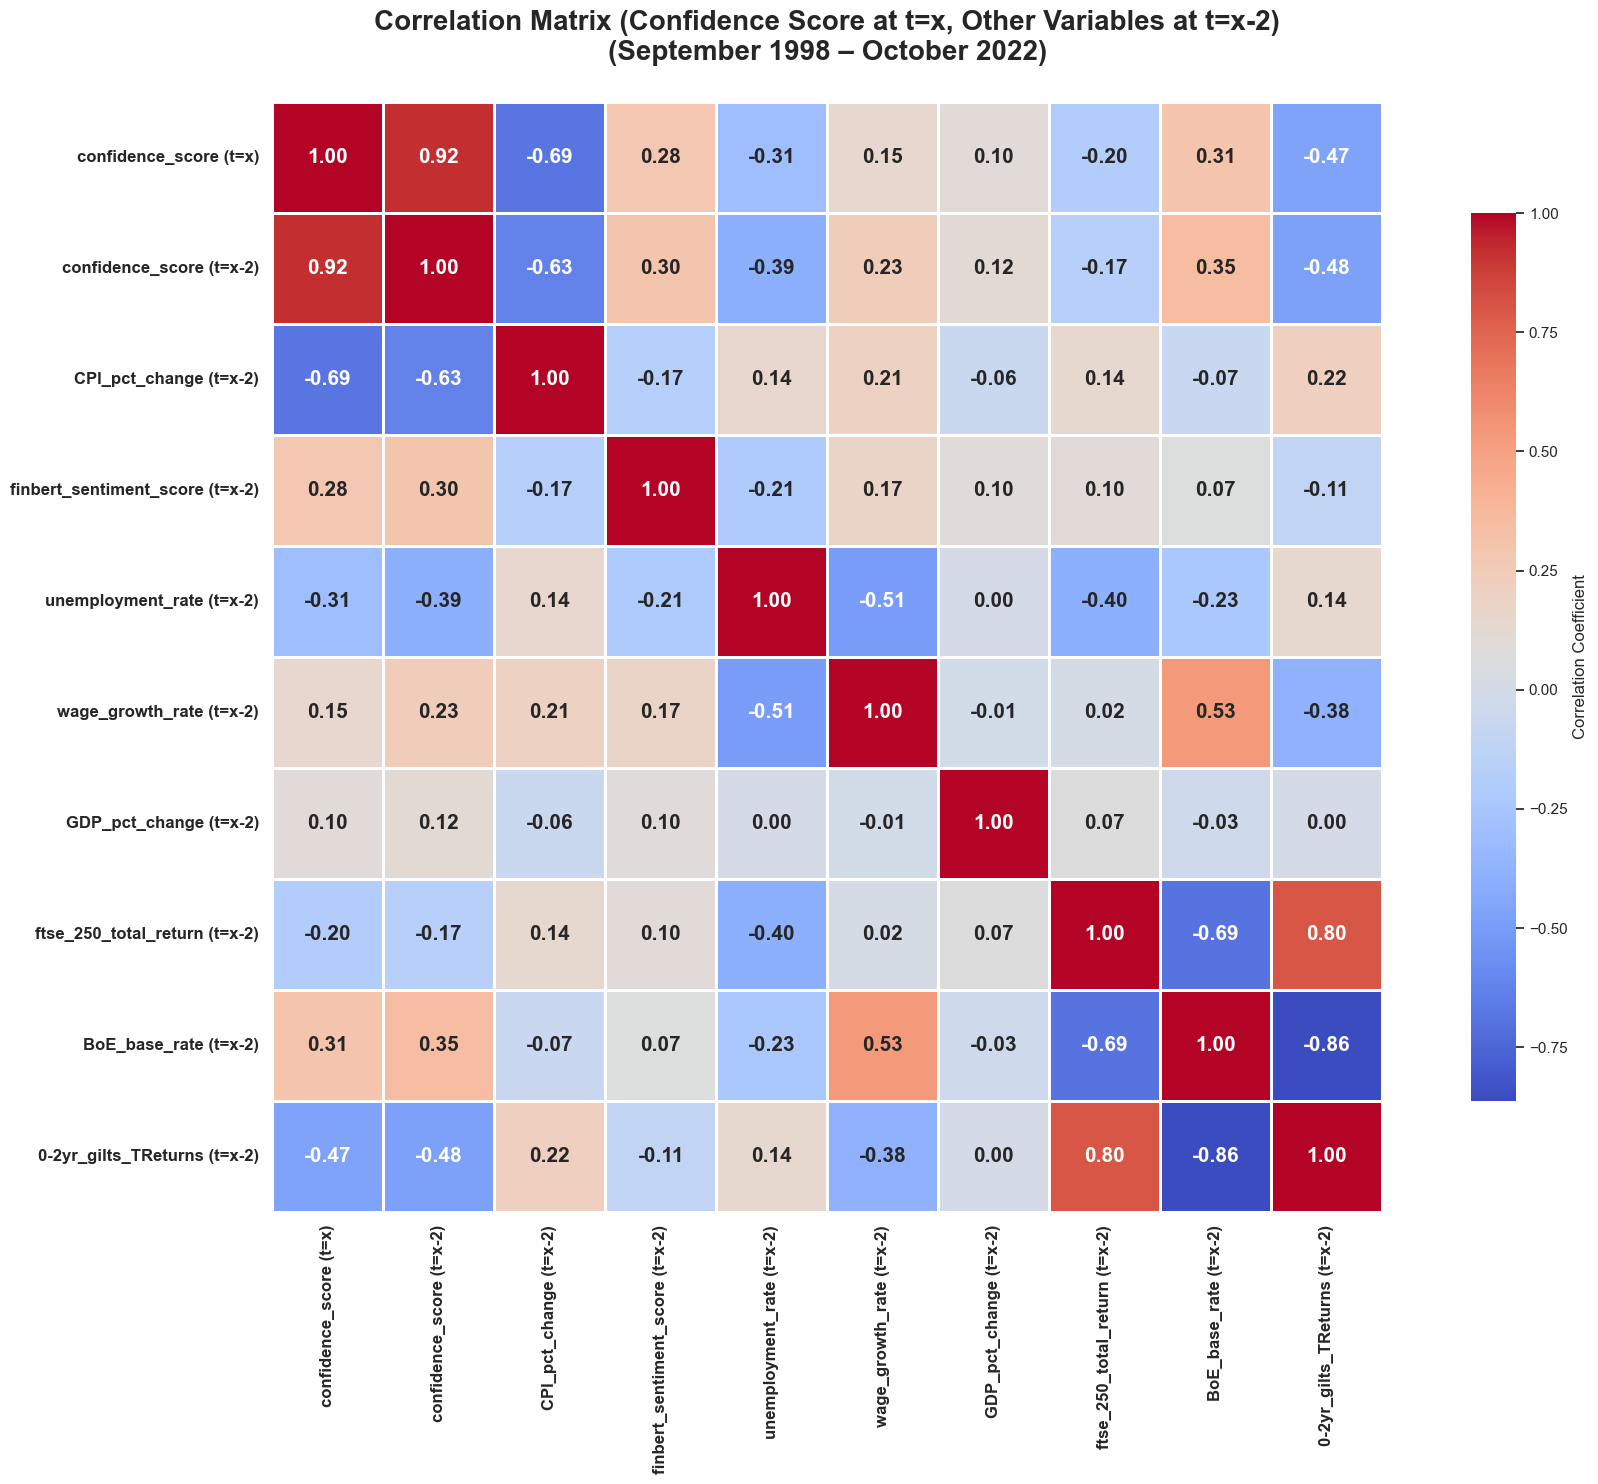

In [440]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Define date range
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) &
    (df_uk_focused['Date'] <= end_date)
].copy()

# Define columns of interest (excluding confidence_score)
columns_of_interest = ['confidence_score',
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 2-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-2)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

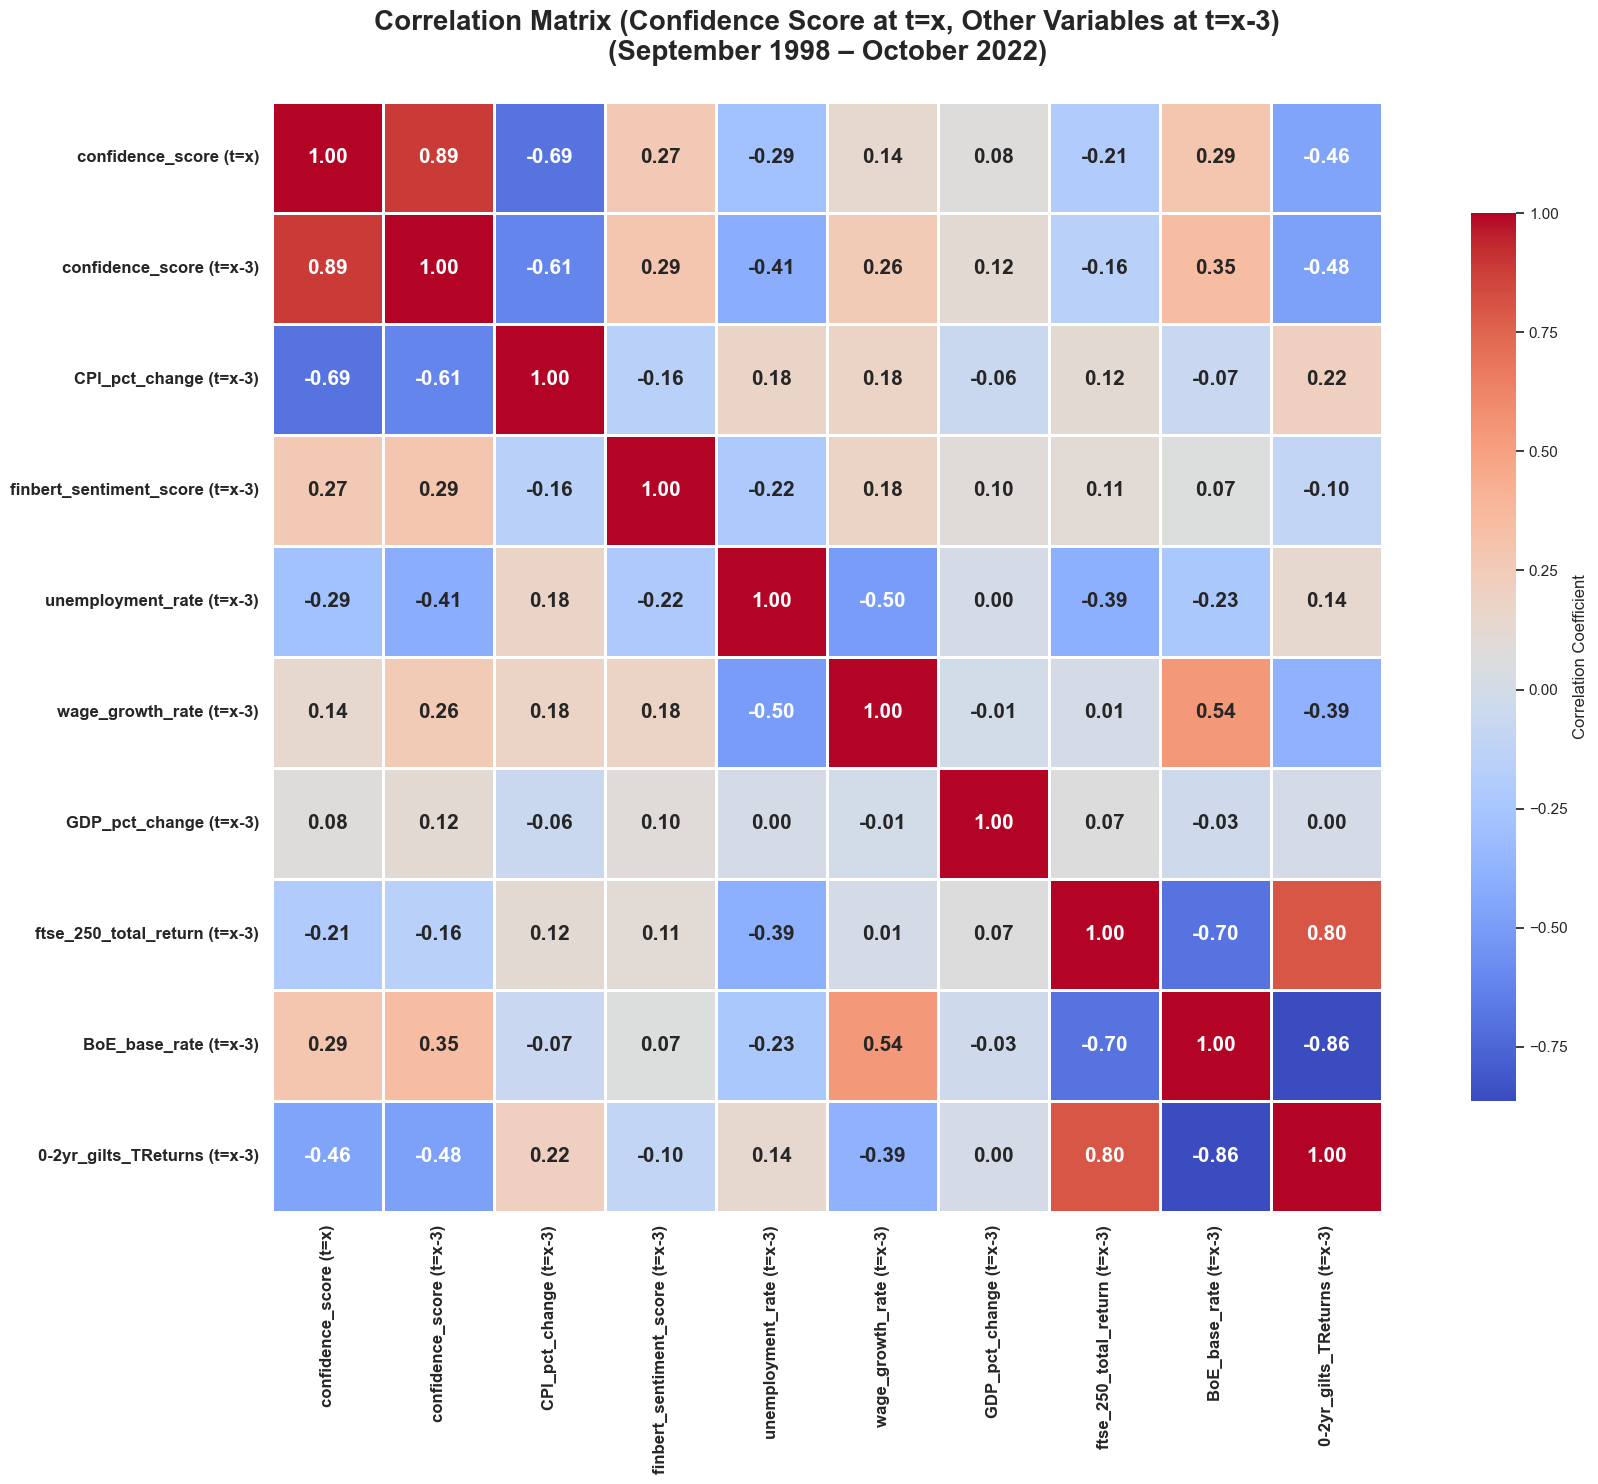

In [444]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Define date range
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) &
    (df_uk_focused['Date'] <= end_date)
].copy()

# Define columns of interest (excluding confidence_score)
columns_of_interest = ['confidence_score',
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 3-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-3)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


#### From the heatmaps you provided, the highest correlation values with confidence score (t=x) and confidence score (t=x-1) were observed at the following time lags:CPI (% change) reached its highest correlation of -0.56 at t=x-3, showing that inflation most strongly impacts consumer confidence with a 3-month delay.Unemployment rate showed its peak correlation of 0.44 at t=x-3, suggesting that the public sentiment reacts most clearly to employment conditions with a 3-month lag.GDP (% change) had the strongest relationship of 0.62 at t=x-1, indicating that a 1-month lag gives the most accurate reflection of how GDP changes influence confidence.BoE base rate reached its highest correlation of -0.52 at t=x-3, again showing a 3-month lag is most effective in capturing the influence of interest rates on confidence.

In [448]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) &
    (df_uk_focused['Date'] <= end_date)
].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']

# Add required variables with specific time lags
regression_df['confidence_score (t=x)'] = filtered_df['confidence_score']
regression_df['confidence_score (t=x-1)'] = filtered_df['confidence_score'].shift(1)
regression_df['BoE_base_rate (t=x-3)'] = filtered_df['BoE_base_rate'].shift(3)
regression_df['unemployment_rate (t=x-3)'] = filtered_df['unemployment_rate'].shift(3)
regression_df['GDP_pct_change (t=x-1)'] = filtered_df['GDP_pct_change'].shift(1)
regression_df['CPI_pct_change (t=x-3)'] = filtered_df['CPI_pct_change'].shift(3)
# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation matrix
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)


,confidence_score (t=x),confidence_score (t=x-1),BoE_base_rate (t=x-3),unemployment_rate (t=x-3),GDP_pct_change (t=x-1),CPI_pct_change (t=x-3)
confidence_score (t=x),1.000000,0.959633,0.399993,-0.256605,0.120602,-0.708838
confidence_score (t=x-1),0.959633,1.000000,0.409968,-0.296396,0.123603,-0.692491
BoE_base_rate (t=x-3),0.399993,0.409968,1.000000,-0.175089,-0.014624,-0.181629
unemployment_rate (t=x-3),-0.256605,-0.296396,-0.175089,1.000000,0.002744,0.167257
GDP_pct_change (t=x-1),0.120602,0.123603,-0.014624,0.002744,1.000000,-0.122336
CPI_pct_change (t=x-3),-0.708838,-0.692491,-0.181629,0.167257,-0.122336,1.000000


In [545]:
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    ['confidence_score (t=x-1)','BoE_base_rate (t=x-3)', 'unemployment_rate (t=x-3)',
     'GDP_pct_change (t=x-1)','CPI_pct_change (t=x-3)']
]

# Initialize and fit the model
mlr = LinearRegression()
mlr.fit(X, y)

# Print coefficients
coefficients = pd.Series(mlr.coef_, index=X.columns)
intercept = mlr.intercept_

print("Intercept:", intercept)
print("Coefficients:")
print(coefficients)

Intercept: -1.3376999916289805
Coefficients:
confidence_score (t=x-1)     0.912107
BoE_base_rate (t=x-3)        0.111576
unemployment_rate (t=x-3)    0.268904
GDP_pct_change (t=x-1)      -0.004175
CPI_pct_change (t=x-3)      -0.737143
dtype: float64


In [547]:
LinearRegression()

LinearRegression()

In [549]:
# Call the predictions for X (array).
mlr.predict(X)

array([-6.27426697e+00, -6.28124048e+00, -7.27602589e+00, -2.71549118e+00,
       -1.06760367e+00,  7.29551149e-01,  8.21191749e-01,  4.23452948e+00,
        4.33652838e+00,  1.70679883e+00,  3.51706569e+00,  1.67609441e+00,
        1.75910676e+00, -1.90691338e+00,  9.17903776e-01,  7.24288504e+00,
        1.88479514e+00, -1.55334553e+00, -3.42337971e+00,  2.24119006e+00,
        3.88178769e-01, -2.30364261e+00,  1.06753686e+00, -4.48114363e+00,
        2.98209589e-01, -1.79629576e+00, -9.14656177e-01,  4.45505624e+00,
        1.93755393e+00,  2.77570946e+00,  9.95995029e-01,  1.79355022e+00,
        5.17958007e+00,  2.98579085e+00, -6.71934930e-01, -1.34447150e+00,
       -5.29705463e+00, -3.13216310e+00, -1.26212892e+00,  5.38857934e+00,
        4.25346978e+00,  2.03109923e+00,  3.04195130e+00,  4.86430558e+00,
        4.93532534e+00,  1.72732401e+00,  1.87289308e+00,  3.32625818e+00,
        6.88682481e-01,  1.57203943e+00, -4.19690168e+00, -3.38725907e+00,
       -9.03607939e+00, -

In [551]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9256696435137547
Intercept:  -1.3376999916289805
Coefficients:


[('confidence_score (t=x-1)', 0.9121069407490053),
 ('BoE_base_rate (t=x-3)', 0.1115761566031483),
 ('unemployment_rate (t=x-3)', 0.2689038905326536),
 ('GDP_pct_change (t=x-1)', -0.004174876938929653),
 ('CPI_pct_change (t=x-3)', -0.7371433889844314)]

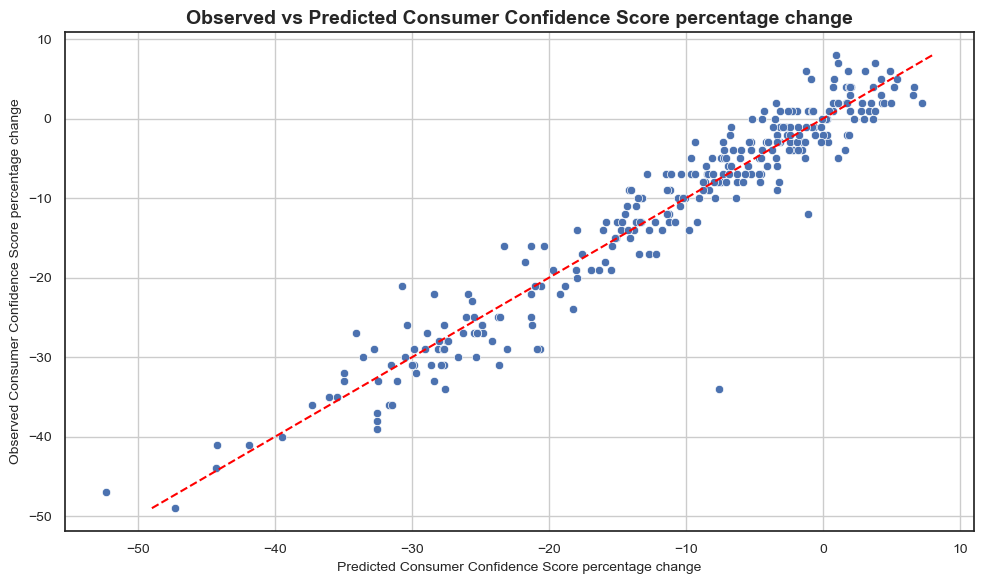

In [553]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['confidence_score (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Consumer Confidence Score percentage change', fontsize=10)
plt.ylabel('Observed Consumer Confidence Score percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Consumer Confidence Score percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### The scatter plot shows a strong alignment between predicted and actual values of the Consumer Confidence Score percentage change. Most data points cluster closely around the red dashed line, which represents perfect prediction. This suggests that the regression model performs well, with high predictive accuracy and minimal error across the dataset. The visual pattern supports the high R² value reported in the regression summary.

### Training and testing subsets with MLR

In [557]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [559]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                              OLS Regression Results                              
Dep. Variable:     confidence_score (t=x)   R-squared:                       0.919
Model:                                OLS   Adj. R-squared:                  0.917
Method:                     Least Squares   F-statistic:                     511.0
Date:                    Sat, 17 May 2025   Prob (F-statistic):          5.30e-121
Time:                            20:21:19   Log-Likelihood:                -619.71
No. Observations:                     232   AIC:                             1251.
Df Residuals:                         226   BIC:                             1272.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

#### This OLS regression model explains 91.9% of the variation in the current consumer confidence score, showing a very strong fit. The previous month’s confidence score (t=x-1) is highly significant and the strongest predictor. CPI change at a three-month lag (t=x-3) is also significant and negatively associated with confidence. Other variables—BoE base rate (t=x-3), unemployment rate (t=x-3), and GDP change (t=x-1)—are not statistically significant. Residual diagnostics suggest good independence (Durbin-Watson = 2.417), though normality is violated, as indicated by the Jarque-Bera and Omnibus tests.

In [562]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [564]:
LinearRegression()

LinearRegression()

In [566]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [-2.58584866e-01 -8.24179049e+00 -6.99181543e+00 -3.92781181e+00
 -1.68902007e+00 -1.63846632e+01 -2.77355038e+01 -5.90302675e+00
  2.34972701e+00 -2.31498349e+01 -4.40835080e+00  7.51380552e+00
  3.69512518e+00 -4.49496737e+00 -3.98907177e+00  3.52084048e+00
 -3.02261257e+00  2.03395048e+00 -4.38248885e+01 -1.93683708e+01
 -2.60882342e+01 -2.14557888e+00 -1.39302187e+00 -2.65871398e+01
 -1.55384015e+01 -1.26573565e+01  1.77985881e+00 -2.54429752e+01
 -3.38279576e+00 -7.62196498e+00 -9.22988611e+00 -1.02047742e+01
 -4.31471131e+00 -7.29846505e+00 -7.78752251e+00 -1.31537380e+01
 -3.31094797e+00 -7.39804516e+00 -1.13459692e+01 -1.14120918e+00
 -1.33781284e+01 -2.81040802e+01 -1.39106405e+00 -3.27640672e+01
 -3.08023660e+01 -3.13054271e+01 -2.59632825e+00  1.76103905e+00
  1.97244979e+00 -2.46957609e+01 -5.84917386e-01 -3.22063450e-01
 -1.60490509e+01 -1.32482142e+01 -2.60818523e+01 -5.51039362e+00
 -2.52797748e+01 -1.25573033e+01 -4.44857662e+00 -2.70843028e+01


In [568]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [ -8.45987775 -32.6952576    1.80910683 -21.44864955 -19.95630629
 -29.26982817 -11.17789444 -35.0579171    1.85410169  -4.3662932
 -28.42806832  -9.12923904   3.2999434  -18.02311679 -11.13532118
   0.42909838   1.92506867   0.94283319 -11.30991506 -26.26648741
 -33.91428346  -8.27098585  -9.20048894  -8.34707621   0.47483719
 -46.79809646 -14.51001485  -9.67664125  -3.29223929   6.54057447
   3.26568156  -2.35100601 -27.74348279 -37.56067058  -3.22073653
 -28.1311703  -15.19521102 -18.30355793 -29.22470703  -0.42895164
 -20.92887955  -2.2766273  -31.1332095  -33.04082922 -11.42040339
   1.14229904   1.20701415   0.38926349  -9.49573859 -31.65131715
 -14.70776817  -1.63647755  -1.50139238 -25.31510519  -3.1123098
 -20.69875522 -13.07362527 -28.90706389   0.98587654]


In [570]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

94.64757277212048


#### An R-squared value of 94.64% indicates that the regression model explains nearly 95% of the variance in the Consumer Confidence Score on the test data. This suggests a very strong fit and high predictive power.

### Check for multicollinearity

In [574]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                   features
0        23.8                      const
1         2.5   confidence_score (t=x-1)
2         1.2      BoE_base_rate (t=x-3)
3         1.1  unemployment_rate (t=x-3)
4         1.0     GDP_pct_change (t=x-1)
5         2.0     CPI_pct_change (t=x-3)


#### The Variance Inflation Factor (VIF) results indicate that multicollinearity is not a concern in this regression model. All predictors have VIF values well below the commonly used threshold of 5, suggesting they are not highly correlated with one another. The constant term has a higher VIF (23.8), which is expected and not problematic. Therefore, the independent variables—especially confidence_score (t=x-1), BoE_base_rate (t=x-3), unemployment_rate (t=x-3), GDP_pct_change (t=x-1), and CPI_pct_change (t=x-3)—are suitable for inclusion in the model without multicollinearity issues.

### Check for heteroscedasticity

In [576]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [578]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 8.31246179970708, 'LM Test p-value': 0.13983525892519494, 'F-stat': 1.6796790575357514, 'F-test p-value': 0.14043193798513046}


#### he Breusch-Pagan test results suggest that heteroskedasticity is not a significant issue in the model. The LM test p-value (0.14) and F-test p-value (0.14) are both above the common significance threshold of 0.05, indicating that the null hypothesis of homoskedasticity (constant variance of residuals) cannot be rejected. In other words, the residuals appear to have roughly equal variance across all levels of the predicted values, which supports the validity of the regression model’s standard errors and inference.

### Check normality of regression residuals - assumption of MLR

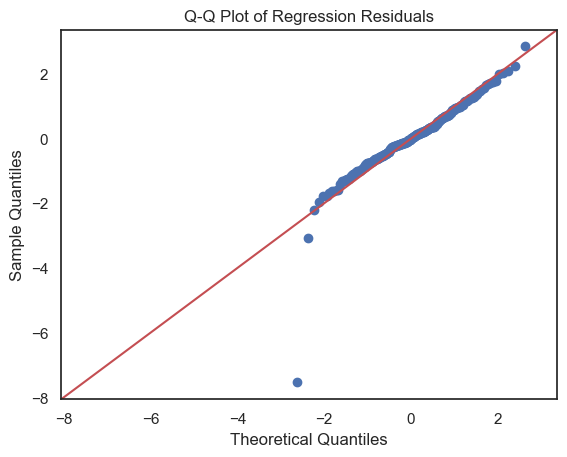

In [582]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

#### The Q-Q plot shows that most of the residuals lie along the 45-degree reference line, suggesting that the residuals are approximately normally distributed. A few points deviate in the tails, indicating minor departures from normality, but overall the assumption of normality appears to be reasonably met.

### Evaluate the model

In [586]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 2.304723441078659
Mean Square Error (Final): 9.117423869702495


#### The evaluation metrics indicate that the model performs reasonably well:The Mean Absolute Error (MAE) of 2.30 means that, on average, the model’s predictions differ from the actual consumer confidence scores by about 2.3 points.The Mean Square Error (MSE) of 9.12 reflects a modest level of squared prediction error, with larger errors being penalized more due to the squaring.Together with a high R² from earlier analysis, these error values confirm that the model offers solid predictive accuracy, with relatively low average deviation in predicted confidence scores.

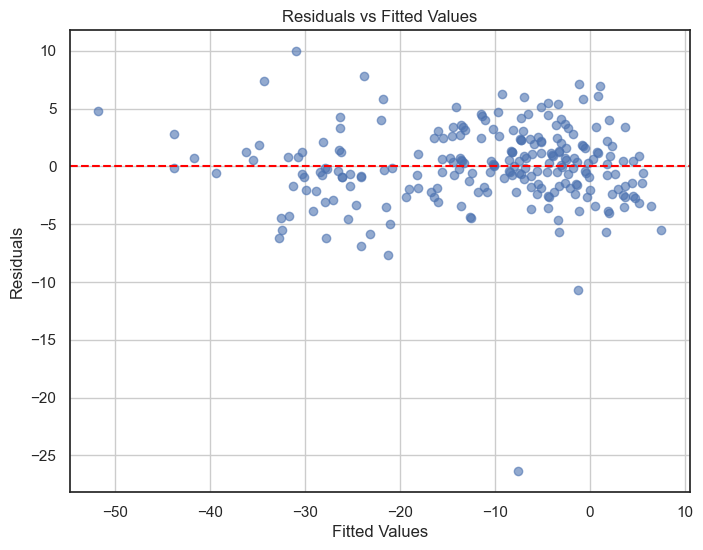

In [589]:
# Fitted values from statsmodels
fitted_vals = model1.fittedvalues
residuals = model1.resid

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

#### The residuals vs. fitted values plot shows that the residuals are generally centered around zero, which is a good sign. However, there is some visible funnel-shaped spread and mild curvature, especially for lower fitted values (left side), indicating slight heteroskedasticity or non-linearity. While the pattern is not extreme, it suggests that the variance of residuals may not be entirely constant across all levels of predicted values. 

### Multiple linear regression: Drop confidence_score, and  CPI as variables and explore transformation of dependent variable (if possible)

### Re-perform MLR 

In [599]:
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    ['confidence_score (t=x-1)','BoE_base_rate (t=x-3)','unemployment_rate (t=x-3)','GDP_pct_change (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [601]:
LinearRegression()

LinearRegression()

In [603]:
# Call the predictions for X (array).
mlr.predict(X)

array([ -6.78109047,  -6.78452265,  -7.81982468,  -2.92900315,
        -0.97045173,   0.97095163,   0.94349417,   4.84928703,
         4.81932333,   1.84828578,   3.79775003,   1.81512087,
         1.81969711,  -2.11806414,   0.82209662,   7.67611112,
         1.84366991,  -2.09479454,  -4.03739442,   1.80076709,
        -0.18698411,  -3.15230135,   0.69985129,  -5.17027861,
        -0.28060114,  -2.20839355,  -1.25925877,   4.57890274,
         1.64326576,   2.61729468,   0.63014174,   1.57176142,
         5.44847229,   3.50809521,  -0.40913826,  -1.36339507,
        -5.28062854,  -3.33802866,  -1.39542877,   5.45394418,
         4.47486463,   2.48913703,   3.49606635,   5.45147972,
         5.451761  ,   1.53818853,   1.53727328,   3.49328491,
         0.587557  ,   1.5351258 ,  -4.33537355,  -3.38780476,
        -9.28738611, -10.23558887,  -5.31600232,  -3.39209972,
        -2.44636142,  -1.50062312,  -3.40033695,  -3.40368097,
        -3.42992905,  -6.36098978,  -5.41146662,  -0.51

In [605]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9218276211159865
Intercept:  -2.179869760804996
Coefficients:


[('confidence_score (t=x-1)', 0.9781643061306796),
 ('BoE_base_rate (t=x-3)', 0.05491490953850488),
 ('unemployment_rate (t=x-3)', 0.2968026287527477),
 ('GDP_pct_change (t=x-1)', 0.005982654282458311)]

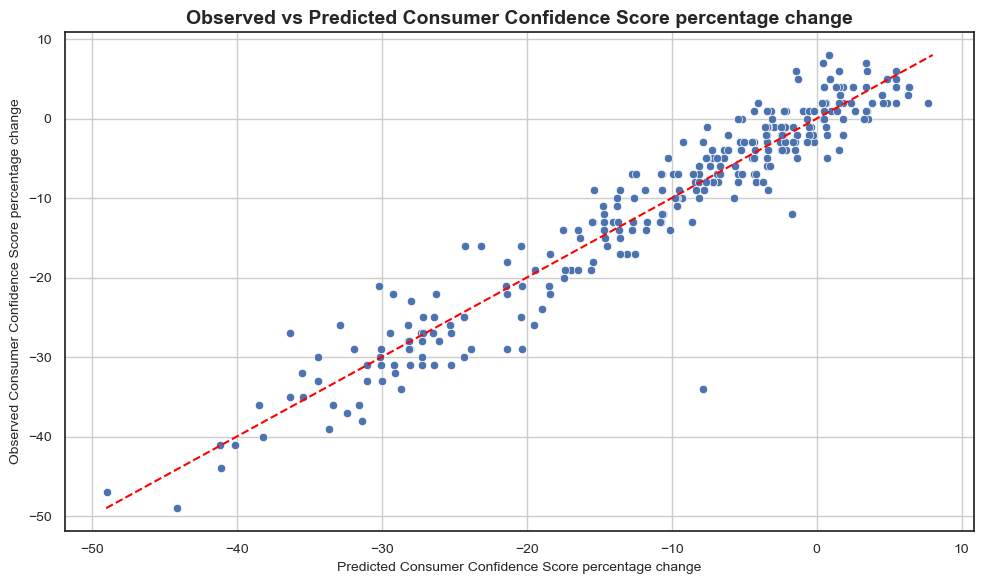

In [607]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['confidence_score (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Consumer Confidence Score percentage change', fontsize=10)
plt.ylabel('Observed Consumer Confidence Score percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Consumer Confidence Score percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [610]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [612]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                              OLS Regression Results                              
Dep. Variable:     confidence_score (t=x)   R-squared:                       0.916
Model:                                OLS   Adj. R-squared:                  0.915
Method:                     Least Squares   F-statistic:                     621.0
Date:                    Sat, 17 May 2025   Prob (F-statistic):          5.85e-121
Time:                            21:05:23   Log-Likelihood:                -623.18
No. Observations:                     232   AIC:                             1256.
Df Residuals:                         227   BIC:                             1274.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [614]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                   features
0        22.7                      const
1         1.3   confidence_score (t=x-1)
2         1.2      BoE_base_rate (t=x-3)
3         1.1  unemployment_rate (t=x-3)
4         1.0     GDP_pct_change (t=x-1)


In [616]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [522]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))


{'LM stat': 8.31246179970708, 'LM Test p-value': 0.13983525892519494, 'F-stat': 1.6796790575357514, 'F-test p-value': 0.14043193798513046}


#### The updated regression model is statistically robust, explaining approximately 91.6% of the variance in consumer confidence (R² = 0.916). Multicollinearity is not a concern, as all VIF values are low. Residual diagnostics, including the Durbin-Watson statistic (~2.4) and Breusch-Pagan LM and F-tests (p > 0.13), confirm no autocorrelation or heteroskedasticity. Overall, the model is well-specified and statistically valid.

In [619]:
regression_df.describe()

,Date,confidence_score (t=x),confidence_score (t=x-1),BoE_base_rate (t=x-3),unemployment_rate (t=x-3),GDP_pct_change (t=x-1),CPI_pct_change (t=x-3)
count,291,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,2010-11-05 16:09:53.814433024,-11.450172,-11.312715,2.313739,5.610309,0.531271,2.114433
min,1998-11-01 00:00:00,-49.000000,-49.000000,0.175000,3.600000,-20.300000,-0.100000
25%,2004-11-16 00:00:00,-20.500000,-19.500000,0.355256,4.800000,0.300000,1.200000
50%,2010-12-01 00:00:00,-8.000000,-8.000000,0.555556,5.200000,0.600000,1.800000
75%,2016-10-16 12:00:00,-2.000000,-2.000000,4.645833,6.200000,0.800000,2.700000
max,2022-10-01 00:00:00,8.000000,8.000000,7.312500,8.500000,16.800000,10.100000
std,NaN,12.483372,12.309590,2.276210,1.305174,3.010284,1.475617


In [621]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 108 to 398
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       291 non-null    datetime64[ns]
 1   confidence_score (t=x)     291 non-null    float64       
 2   confidence_score (t=x-1)   291 non-null    float64       
 3   BoE_base_rate (t=x-3)      291 non-null    float64       
 4   unemployment_rate (t=x-3)  291 non-null    float64       
 5   GDP_pct_change (t=x-1)     291 non-null    float64       
 6   CPI_pct_change (t=x-3)     291 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 18.2 KB


In [623]:
regression_df.head()

,Date,confidence_score (t=x),confidence_score (t=x-1),BoE_base_rate (t=x-3),unemployment_rate (t=x-3),GDP_pct_change (t=x-1),CPI_pct_change (t=x-3)
108,1998-11-01,-7.0,-7.0,7.3125,6.2,0.7,1.4
109,1998-12-01,-8.0,-7.0,7.2500,6.2,0.7,1.4
110,1999-01-01,-3.0,-8.0,6.7500,6.1,0.7,1.4
111,1999-02-01,-1.0,-3.0,6.7500,6.1,0.7,1.4
112,1999-03-01,1.0,-1.0,6.2500,6.2,0.7,1.6


Root Mean Squared Error: 2.9848
Mean Squared Error: 8.9091
Mean Absolute Error: 2.2556
R² Score: 0.9474


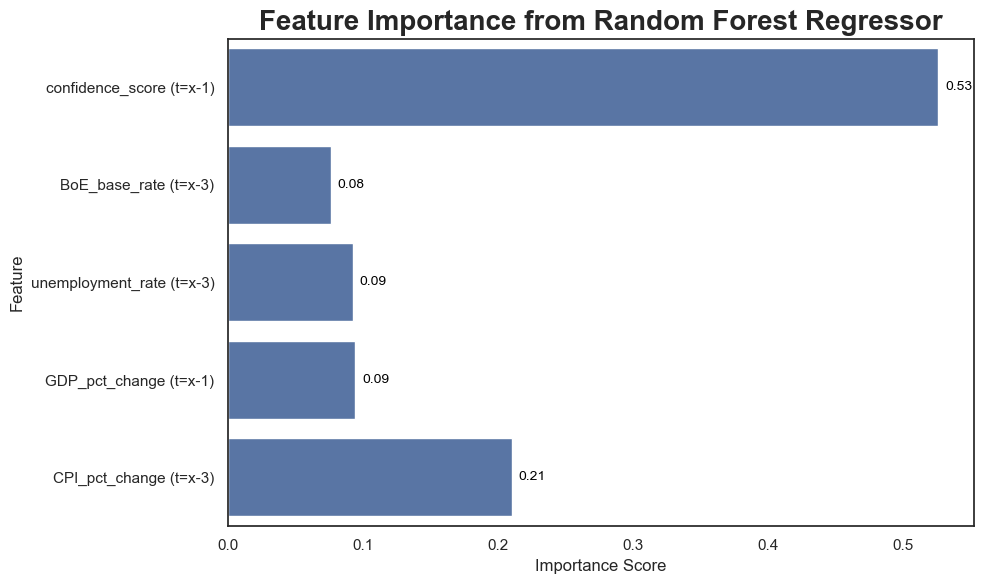

In [625]:
# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['confidence_score (t=x)',
     'confidence_score (t=x-1)','BoE_base_rate (t=x-3)', 'unemployment_rate (t=x-3)',
     'GDP_pct_change (t=x-1)','CPI_pct_change (t=x-3)'
])
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    [
'confidence_score (t=x-1)','BoE_base_rate (t=x-3)', 'unemployment_rate (t=x-3)',
'GDP_pct_change (t=x-1)','CPI_pct_change (t=x-3)'
    ]
]

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Root Mean Squared Error: 3.5815
Mean Squared Error: 12.8270
Mean Absolute Error: 2.6454
R² Score: 0.9242


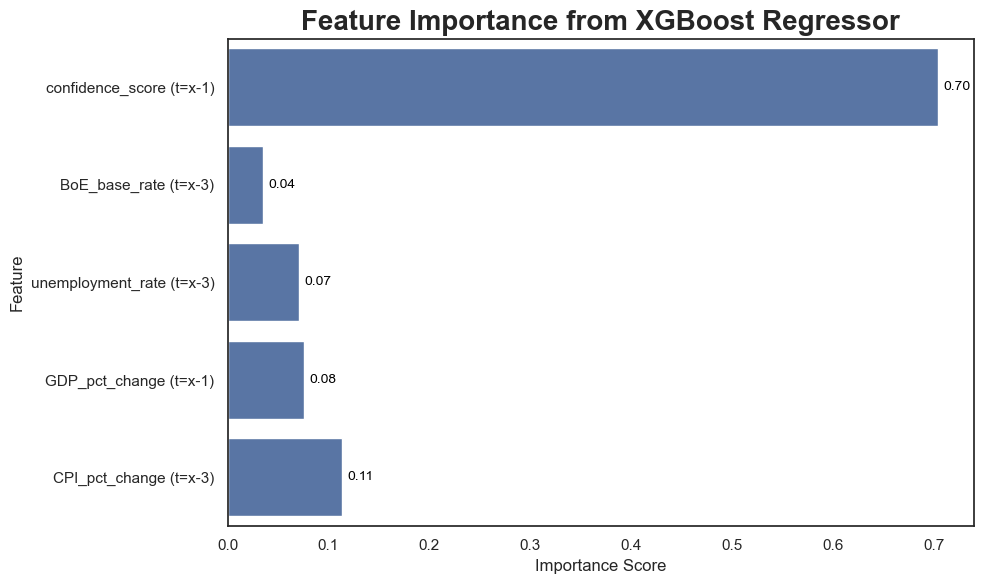

In [627]:
from xgboost import XGBRegressor

# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['confidence_score (t=x)',
     'confidence_score (t=x-1)','BoE_base_rate (t=x-3)', 'unemployment_rate (t=x-3)',
     'GDP_pct_change (t=x-1)','CPI_pct_change (t=x-3)'
])
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    [
'confidence_score (t=x-1)','BoE_base_rate (t=x-3)', 'unemployment_rate (t=x-3)',
'GDP_pct_change (t=x-1)','CPI_pct_change (t=x-3)'
    ]
]
y = regression_df['confidence_score (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

#### The comparison between Random Forest and XGBoost models shows that confidence_score (t=x-1) is the most influential predictor of current consumer confidence in both models. Random Forest assigns it an importance score of 0.53, while XGBoost gives it a higher score of 0.70. Among economic indicators, CPI_pct_change (t=x-3) ranks second in both models, indicating its meaningful impact. Other variables like BoE_base_rate, unemployment_rate, and GDP_pct_change contribute less. Overall, Random Forest performs slightly better with a higher R² score (0.9474 vs 0.9242) and provides a more balanced influence from multiple variables.

### Random Forest vs. XGBoost Models

In [136]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/150.0 MB 13.4 MB/s eta 0:00:12
   ---------------------------------------- 1.7/150.0 MB 21.3 MB/s eta 0:00:07
   - -------------------------------------- 4.0/150.0 MB 31.6 MB/s eta 0:00:05
   - -------------------------------------- 6.3/150.0 MB 36.3 MB/s eta 0:00:04
   -- ------------------------------------- 8.2/150.0 MB 37.4 MB/s eta 0:00:04
   -- ------------------------------------- 9.6/150.0 MB 36.2 MB/s eta 0:00:04
   --- ------------------------------------ 12.0/150.0 MB 46.7 MB/s eta 0:00:03
   --- ------------------------------------ 13.9/150.0 MB 43.5 MB/s eta 0:00:04
   ---- ----------------------------------- 16.0/150.0 MB 43.5 MB/s eta 0:00:04
   ---- ----------------------------------- 18.4/150.0 MB 43.7 MB/s eta 0:00:04
   ----- ---------------------------------- 20.0/150.0 MB 46.9 MB/s eta 0:00:03
   ----- ---------------------------------- 22.0/150.0 


--- Random Forest ---
R² Score: 0.9362
MAE: 2.5217
MSE: 10.8735

--- XGBoost ---
R² Score: 0.9361
MAE: 2.5210
MSE: 10.8807


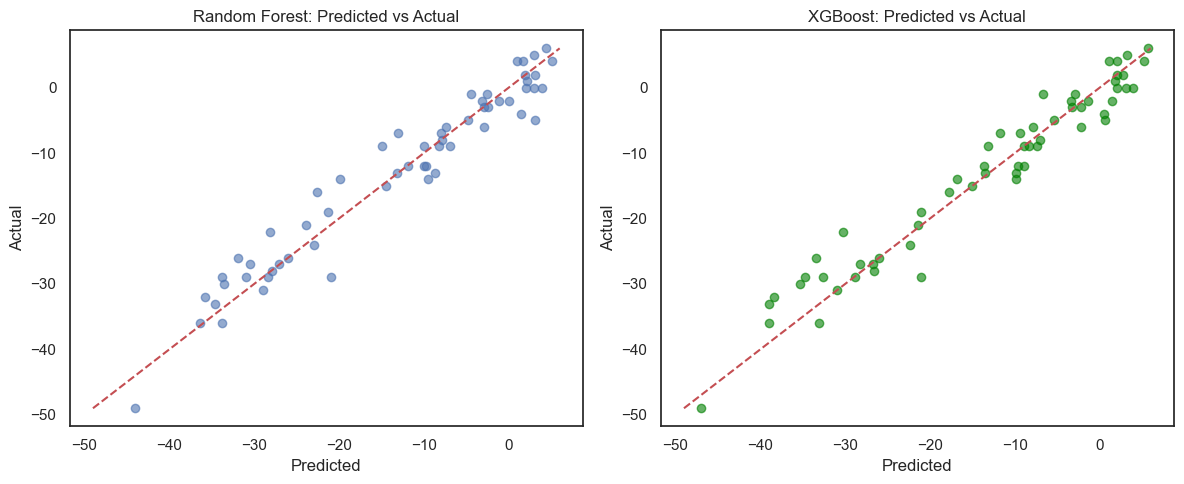

In [630]:
# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(subset=[
    'confidence_score (t=x)',
     'confidence_score (t=x-1)','BoE_base_rate (t=x-3)', 'unemployment_rate (t=x-3)',
     'GDP_pct_change (t=x-1)','CPI_pct_change (t=x-3)'
])

# 2. Define features and target
# -----------------------------
X = regression_df[[
     'confidence_score (t=x-1)','BoE_base_rate (t=x-3)', 'unemployment_rate (t=x-3)',
     'GDP_pct_change (t=x-1)','CPI_pct_change (t=x-3)'
]]
y = regression_df['confidence_score (t=x)']

# 3. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train Random Forest model
# ----------------------------
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 5. Train XGBoost model
# ----------------------
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# 6. Evaluation function
# ----------------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")

# 7. Evaluate both models
# -----------------------
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)

# 8. Plot Predictions vs Actuals
# ------------------------------
plt.figure(figsize=(12, 5))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")

# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")

plt.tight_layout()
plt.show()

#### The comparison of the two scatter plots—Random Forest (left) and XGBoost (right)—shows that both models perform well in predicting the Customer Confidence Score. The predicted values closely align with the actual values along the red dashed reference line in each plot. However, XGBoost demonstrates a slightly tighter clustering around the line with fewer outliers, especially in the lower score ranges, suggesting better overall accuracy and generalization.